In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
def oscillation(nu, tau, phi):
    return np.sin(4*np.pi*tau*nu + phi)

def amplitude_hg07(nu, nu0, delta, gamma):
    return gamma * nu0 * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)

def amplitude_ly23(nu, nu0, delta, gamma):
    return 2*np.sqrt(2*np.pi) * gamma * delta * nu0 * nu * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)
#     return 0.5 * gamma * nu0 * erfi(2 * np.sqrt(2) * np.pi * nu * delta) * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)

In [133]:
num_points = 201
nu_min, nu_max = nu_range = (.001, .004)
nu = np.linspace(nu_min, nu_max, num_points)

tau = 800. # s
phi = 0.

nu0 = 1.4e-4  # Hz
delta = 0.1*tau  # s
gamma = 0.05 * np.sqrt(2*np.pi) * delta  # s

osc = oscillation(nu, tau, phi)
hg07 = amplitude_hg07(nu, nu0, delta, gamma) * osc
ly23 = amplitude_ly23(nu, nu0, delta, gamma) * osc

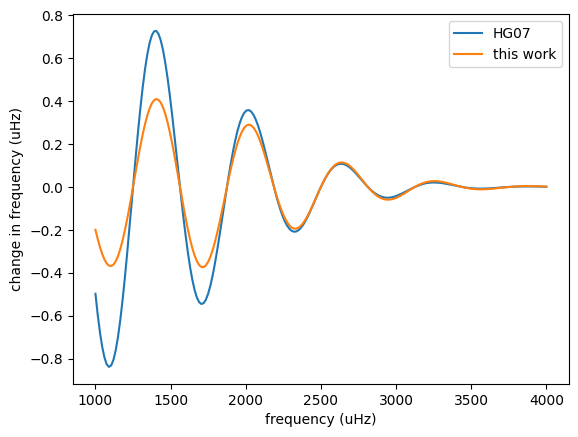

In [134]:
fig, ax = plt.subplots()
fac = 1e6

ax.plot(fac*nu, fac*nu*hg07, label="HG07")
ax.plot(fac*nu, fac*nu*ly23, label="this work")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("change in frequency (uHz)")
ax.legend();

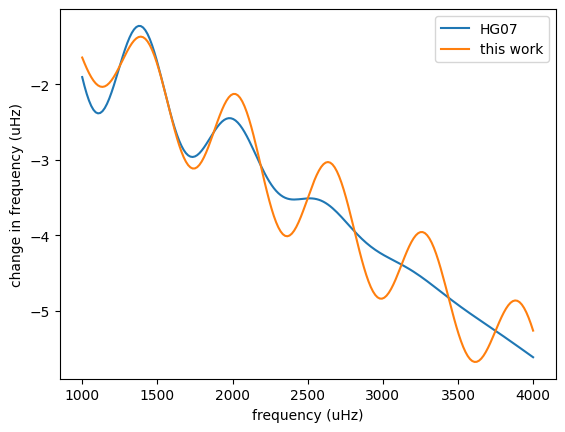

In [122]:
fig, ax = plt.subplots()
fac = 1e6

smo = gamma * nu0  # smooth component of dnu/nu
ax.plot(fac*nu, fac*nu*(hg07 - smo), label="HG07")
ax.plot(fac*nu, fac*nu*(ly23 - smo), label="this work")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("change in frequency (uHz)")
ax.legend();

In [107]:
from scipy.special import erfi

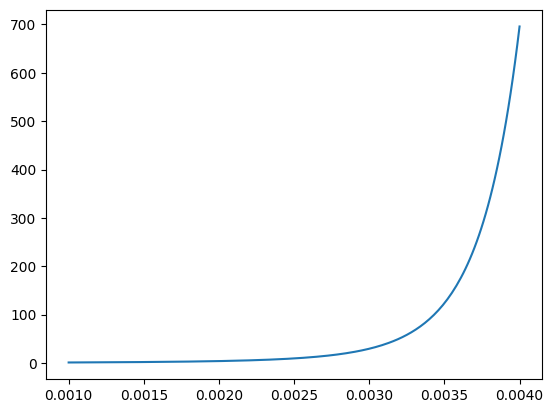

In [131]:
plt.plot(nu, erfi(2 * np.sqrt(2) * np.pi * nu * delta))

In [111]:
plt.plot(nu, erfi(4*np.pi/np.sqrt(2) * nu * delta))

80.0

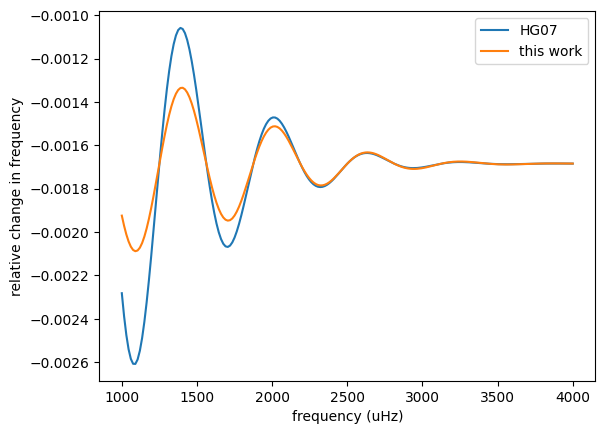

In [96]:
fig, ax = plt.subplots()
fac = 1e6

smo = gamma * nu0  # smooth component of dnu/nu
ax.plot(fac*nu, (hg07 - smo), label="HG07")
ax.plot(fac*nu, (ly23 - smo), label="this work")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("relative change in frequency")
ax.legend();

Text(0, 0.5, 'difference (%)')

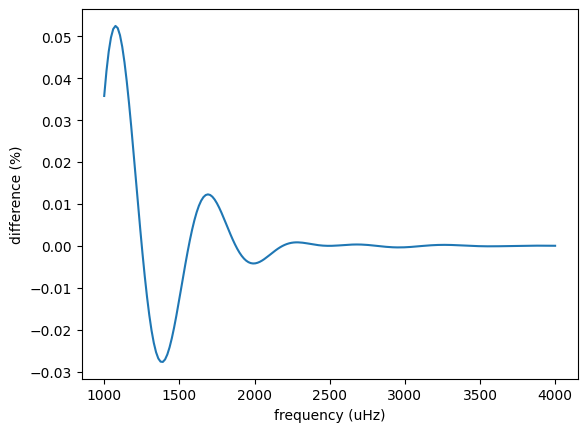

In [93]:
fig, ax = plt.subplots()
fac = 1e6

ax.plot(fac*nu, 100*(ly23 - hg07))

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("difference (%)")
# ax.legend();